### S14 Group 6 Members <br>
Chan, Kendrick Martin <br>
Dy, Fatima Kriselle <br>
Vitan, Layne Ashley <br>
Wu, Waynes Weyner <br>

# **Section 1. Introduction**

This notebook explores the Philippine Statistics Authority's (PSA) Labor Force Survey 2016, a comprehensive dataset that offers insights into the Philippine labor market. The project involves data preprocessing, exploratory data analysis (EDA), and model development to predict key labor outcomes. Three distinct machine learning models are trained and evaluated, followed by error analysis and hyperparameter tuning to improve performance. Finally, the project concludes with a summary of findings and insights drawn from the analysis.   

# **Section 2. Dataset Description**

The Labor Force Survey (LFS) is a nationwide quarterly survey conducted by the Philippine Statistics Authority (PSA) to gather labor market statistics. It provides insights into the levels and trends of employment, unemployment, and underemployment in the Philippines. The data serves as a quantitative framework for developing labor-related policies and programs.

For the April 2016 LFS, data collection was carried out between April 8, 2016, and April 30, 2016. The survey followed a structured methodology to ensure data accuracy and reliability. The sampling design was based on the 2013 Master Sample Design, ensuring comprehensive representation at both the national and regional levels. Data collection was conducted through face-to-face interviews using standardized questionnaires. The process was closely supervised by Regional Directors (RDs) and Provincial Statistics Officers (PSOs) to ensure consistency and adherence to survey protocols. The survey targeted household members aged 15 and older, focusing on individuals within the labor force.
This rigorous data collection process enhances the reliability of the survey's findings, making it a valuable resource for policymakers, economists, and researchers examining the Philippine labor market.

### Dataset Structure
The dataset consists of **180,862** instances and **50** features with rows representing an individual's responses to each question and columns pertaining to the data for a specific attribute across multiple respondents. The features and their respective descriptions are as follows.

1.   `PUFREG` - Region the participant belongs to
2.   `PUFPRV` - Province code of where the participant resides in
3.   `PUFPRRCD` - Recoded province code
4.   `PUFHHNUM` - Unique sequential number assigned to each household
5.   `PUFURB2K10` - Urban or rural classification based on the 2010 FIES survey
6.   `PUFPWGTFIN` - Final weight based on provincial projections
7.   `PUFSVYMO` - Month when the survey was conducted
8.   `PUFSVYYR` - Year when the survey was conducted
9.   `PUFPSU` - Primary Sampling Unit (PSU) number
10.   `PUFRPL` - Replication number used for variance estimation
11.   `PUFHHSIZE` - Number of household members
12.   `PUFC01_LNO` - Line number used to identify each member of the household in the survey
13.   `PUFC03_REL` - Relationship of the participant to the head of the household
14.   `PUFC04_SEX` - Gender of the participant
15.   `PUFC05_AGE` - Age of the participant
16.   `PUFC06_MSTAT` - Marital status of the participant
17.   `PUFC07_GRADE` - Educational attainment of the participant
18.   `PUFC08_CURSCH` - Indicates if the participant is currently attending school
19.   `PUFC09_GRADTECH` - Indicates whether the participant is a graduate of a technical/vocational course
20.   `PUFC10_CONWR` - Overseas Filipino Worker (OFW) Classification
21. `PUFC11_WORK` - Indicates if the participant worked at least one hour in the past week
22. `PUFC12_JOB` - Indicates if the participant had a job or business during the past week despite not working
23. `PUFC14_PROCC` - Primary occupation of the participant during the past week
24. `PUFC16_PKB` - Type of business or industry the participant is involved in
25. `PUFC17_NATEM` - Nature of employment of the participant (permanent, short-term).
26. `PUFC18_PNWHRS` - Normal working hours per day in the participant’s primary job
27. `PUFC19_PHOURS` - Total hours worked by the participant during the past week
28. `PUFC20_PWMORE` - Indicates if the participant wanted to work more hours in the past week
29. `PUFC21_PLADDW` - Indicates whether the participant looked for additional work during the past week
30. `PUFC22_PFWRK` - Indicates whether this was the participant’s first time doing any work
31. `PUFC23_PCLASS` - Class of worker for the participant’s primary occupation
32. `PUFC24_PBASIS` - Payment basis for the participant’s primary occupation
33. `PUFC25_PBASIC` - Basic pay per day for the participant’s primary occupation
34. `PUFC26_OJOB` - Indicates if the participant had another job or business during the past week
35. `PUFC27_NJOBS` - Number of jobs the participant had during the past week
36. `PUFC28_THOURS` - Total hours worked by the participant across all jobs during the past week
37. `PUFC29_WWM48H` - Participant's main reason for not working more than 48 hours in the past week
38. `PUFC30_LOOKW` - Indicates if the participant looked for work or tried to start a business in the past week
39. `PUFC31_FLWRK` - Indicates if it was the participant’s first time looking for work or starting a business
40. `PUFC32_JOBSM` - Method the participant used to search for work
41. `PUFC33_WEEKS` - Number of weeks the participant spent looking for work
42. `PUFC34_WYNOT` - Reason the participant did not look for work
43. `PUFC35_LTLOOKW` - Period of the participant’s last job search attempt
44. `PUFC36_AVAIL` - Indicates if the participant would have been available for work had an opportunity existed
45. `PUFC37_WILLING` - Indicates if the participant was willing to take up work in the past week or within two weeks
46. `PUFC38_PREVJOB` - Indicates if the participant had worked at any time before
47. `PUFC40_POCC` - Last occupation held by the participant
48. `PUFC41_WQTR` - Indicates if the participant worked at all or had a job/business during the past quarter
49. `PUFC43_QKB` - Type of business the participant engaged in during the past quarter
50. `PUFNEWEMPSTAT` - Employment status based on new employment criteria (employed, unemployed, not in labor force)

# **Section 3. List of Requirements**

List all the Python libraries and modules that the project used.

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

The rest that will be shown are for the group to use.

In [160]:
# 1 Windows
# 2 Linux
# 3 Google Collab
ENV = 1
sns.set(style="whitegrid")
# google drive
DRIVE_PATH = '/content/drive/MyDrive/STINTSY/Datasets/'

FILENAME = 'LFS PUF April 2016.CSV'
LOCAL_PATH = 'data/'

import Utils

labor_df = Utils.load_data(FILENAME, LOCAL_PATH, ENV)

# **Section 4. Data Preprocessing and Cleaning**

To be able to clean the data, first we must identify for any inconsistencies, errors, or missing values that need to be addressed.

 The process involves using data observability tools to look for various types of problems, including:

- Missing or empty data points
- Incorrect values
- Mismatched data types
- Duplicate entries
- Inconsistent formatting

#### Information about the data

In [161]:
labor_df.head(5)

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


In [162]:
labor_df.tail(5)

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,,,,,,,,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,,8,,,,2,,,,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180861,17,59,5900,40880,2,277.5219,4,2016,258,1,...,,,,,,,,1,01,1


In [163]:
labor_df.describe()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE
count,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.0,180862.0,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000
mean,9.398801,45.825309,4585.055324,20528.231873,1.574947,568.527169,4.0,2016.0,386.270272,2.490379,5.504783,3.252391,2.931489,1.493874,27.889772
std,4.667034,24.939767,2494.028733,11827.708144,0.494352,508.519331,0.0,0.0,440.160045,1.118970,2.370169,2.077130,1.832299,0.499964,20.052132
min,1.000000,1.000000,100.000000,1.000000,1.000000,34.998400,4.0,2016.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.000000,24.000000,2402.000000,10256.250000,1.000000,245.065975,4.0,2016.0,107.000000,1.000000,4.000000,2.000000,2.000000,1.000000,11.000000
50%,10.000000,46.000000,4600.000000,20406.000000,2.000000,392.993500,4.0,2016.0,243.000000,2.000000,5.000000,3.000000,3.000000,1.000000,24.000000
75%,13.000000,71.000000,7100.000000,30962.000000,2.000000,679.526775,4.0,2016.0,482.000000,3.000000,7.000000,4.000000,3.000000,2.000000,42.000000
max,17.000000,98.000000,9804.000000,40880.000000,2.000000,4509.316000,4.0,2016.0,3053.000000,4.000000,23.000000,23.000000,11.000000,2.000000,99.000000


In [164]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

Now that we are able to manually observe the dataset, we can now move on to querying for data inconsistencies

#### Inconsistencies Overview

Before we continue, let's first convert object to category type.


In [165]:
# for col in labor_df.select_dtypes(include=['object']).columns:
#     labor_df[col] = labor_df[col].astype('category')

In [166]:
labor_df.replace(" ", np.nan, inplace=True)

missing_data = labor_df.isnull().sum()
missing_percentage = (missing_data / len(labor_df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]

print(missing_df)

                 Missing Values  Percentage
PUFC06_MSTAT              18339   10.139775
PUFC08_CURSCH            107137   59.236877
PUFC09_GRADTECH           57782   31.948115
PUFC10_CONWR              57782   31.948115
PUFC11_WORK               21894   12.105362
PUFC12_JOB                93306   51.589610
PUFC17_NATEM             109507   60.547268
PUFC20_PWMORE            109507   60.547268
PUFC21_PLADDW            109507   60.547268
PUFC22_PFWRK             109507   60.547268
PUFC23_PCLASS            109507   60.547268
PUFC24_PBASIS            138947   76.824872
PUFC26_OJOB              109507   60.547268
PUFC27_NJOBS             174924   96.716834
PUFC29_WWM48H            163629   90.471741
PUFC30_LOOKW             132692   73.366434
PUFC31_FLWRK             178569   98.732183
PUFC32_JOBSM             178569   98.732183
PUFC34_WYNOT             134985   74.634252
PUFC35_LTLOOKW           179269   99.119218
PUFC36_AVAIL             174893   96.699694
PUFC37_WILLING           174893 

First, we look if there are any missing values in case we need to impute or remove. Here we can see that there is a lot of missing data from specific features. But how do we choose which to impute and which to remove. By looking at the percentages, and considering which features are of importance we can start removing data with missing values greater or equal to 40%. But for those with data missing less than 40%, we can opt to impute.

In [167]:
columns_to_drop = [
    'PUFC08_CURSCH', 'PUFC12_JOB', 'PUFC17_NATEM', 'PUFC20_PWMORE', 'PUFC21_PLADDW',
    'PUFC22_PFWRK', 'PUFC23_PCLASS', 'PUFC24_PBASIS', 'PUFC26_OJOB', 'PUFC27_NJOBS',
    'PUFC29_WWM48H', 'PUFC30_LOOKW', 'PUFC31_FLWRK', 'PUFC32_JOBSM', 'PUFC34_WYNOT',
    'PUFC35_LTLOOKW', 'PUFC36_AVAIL', 'PUFC37_WILLING', 'PUFC38_PREVJOB', 'PUFC41_WQTR'
]

labor_df.drop(columns=columns_to_drop, inplace=True)

In [168]:
categorical_cols_to_impute = ['PUFC06_MSTAT', 'PUFC09_GRADTECH', 'PUFC10_CONWR', 'PUFC11_WORK', 'PUFNEWEMPSTAT']

for col in categorical_cols_to_impute:
    labor_df.loc[:, col] = labor_df[col].fillna(labor_df[col].mode()[0])

Now we will fix datatypes of some important features that we will be using 

Based on https://elibrary.judiciary.gov.ph/thebookshelf/showdocs/10/74561, it is said that any people under the age of 15 are not allowed to work/part time. So we plan to remove all ages under 15 in the dataset.

In [169]:
labor_df = labor_df[labor_df['PUFC05_AGE'] >= 15]

Basic income will be our target for models, there are a lot of whitespaces/empty string and it is not in the correct datatype.

In [170]:
labor_df.drop(columns=['PUFC25_PBASIC'])

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC11_WORK,PUFC14_PROCC,PUFC16_PKB,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC28_THOURS,PUFC33_WEEKS,PUFC40_POCC,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,1,61,01,08,024,032,,,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,1,92,01,04,008,008,,,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,1,92,01,08,024,034,,,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,1,61,01,04,020,033,,,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,1,91,96,12,072,072,,,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180850,17,59,5900,40879,2,239.4341,4,2016,258,1,...,1,62,03,05,030,040,,,03,1
180851,17,59,5900,40879,2,189.8885,4,2016,258,1,...,1,61,01,04,028,048,,,01,1
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,1,13,50,08,040,040,,,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,2,,,,,,,,,3


In [171]:
# # contains many whitespaces as null values

# labor_df['PUFC25_PBASIC'] = labor_df['PUFC25_PBASIC'].astype(str).replace('     ','')

# # remove rows where user is employed but no pay (38322 rows)
# labor_df = labor_df[~ ((labor_df['PUFNEWEMPSTAT'] == '1') & (labor_df['PUFC25_PBASIC'] == '')) ]

# # # default value of 0
# labor_df['PUFC25_PBASIC'] = labor_df['PUFC25_PBASIC'].replace('', '0').astype(int)
# assert (labor_df.shape[0] == (123080 - 38322))

In [172]:
missing_values = labor_df.isnull().sum()  # Compute once
missing_values = missing_values[missing_values > 0]  # Filter only missing columns

print("Remaining Missing Values After Cleaning:")
print(missing_values)


Remaining Missing Values After Cleaning:
Series([], dtype: int64)


After dropping features and imputing for some, there are no more missing data. We can now proceed for checking if there are any duplicated data. For this dataset, there should be little concern over duplicated data unless there are records of the same person from the same household, which can be seen as such below.

In [173]:
duplicate_household_members = labor_df.duplicated(subset=['PUFHHNUM', 'PUFC01_LNO'], keep=False)

print("Number of duplicate individual records in the same household:", duplicate_household_members.sum())

Number of duplicate individual records in the same household: 0


Finally, now that we've dropped and imputed the missing data we can now deal with outliers.

In [174]:
print("Skewness: ")
numeric_labor_df = labor_df.select_dtypes(include=np.number)
print(numeric_labor_df.skew())

Skewness: 
PUFREG       -0.126437
PUFPRV       -0.110684
PUFPRRCD     -0.111367
PUFHHNUM     -0.008171
PUFURB2K10   -0.233028
PUFPWGTFIN    2.019856
PUFSVYMO      0.000000
PUFSVYYR      0.000000
PUFPSU        2.354917
PUFRPL        0.013448
PUFHHSIZE     0.928224
PUFC01_LNO    1.797801
PUFC03_REL    2.061101
PUFC04_SEX    0.002047
PUFC05_AGE    0.658714
dtype: float64


In [175]:
log_transform_cols = ['PUFPWGTFIN', 'PUFPSU', 'PUFC03_REL']
for col in log_transform_cols:
    labor_df[col] = np.log1p(labor_df[col])

print(labor_df[log_transform_cols].skew())

PUFPWGTFIN    0.240991
PUFPSU       -0.658956
PUFC03_REL    0.780016
dtype: float64


# **Section 5. Exploratory Data Analysis**

First, let us view the columns that are left after the Data Cleaning and Processing.

In [176]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123080 entries, 0 to 180861
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           123080 non-null  int64  
 1   PUFPRV           123080 non-null  int64  
 2   PUFPRRCD         123080 non-null  int64  
 3   PUFHHNUM         123080 non-null  int64  
 4   PUFURB2K10       123080 non-null  int64  
 5   PUFPWGTFIN       123080 non-null  float64
 6   PUFSVYMO         123080 non-null  int64  
 7   PUFSVYYR         123080 non-null  int64  
 8   PUFPSU           123080 non-null  float64
 9   PUFRPL           123080 non-null  int64  
 10  PUFHHSIZE        123080 non-null  int64  
 11  PUFC01_LNO       123080 non-null  int64  
 12  PUFC03_REL       123080 non-null  float64
 13  PUFC04_SEX       123080 non-null  int64  
 14  PUFC05_AGE       123080 non-null  int64  
 15  PUFC06_MSTAT     123080 non-null  object 
 16  PUFC07_GRADE     123080 non-null  object 
 

1. For the first one, let us see the Age Distribution of the Dataset. 

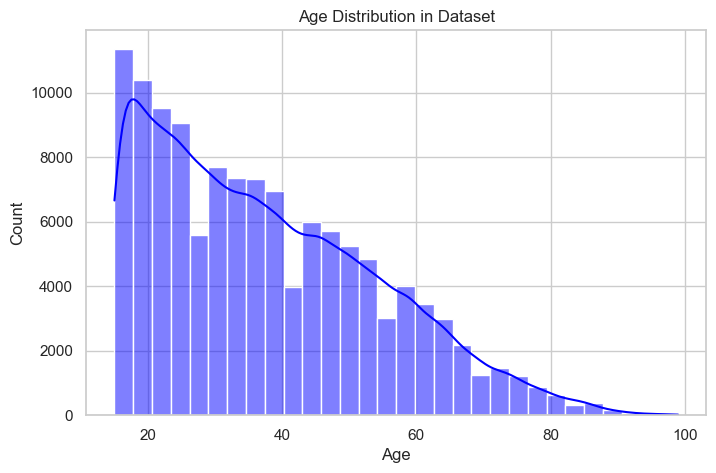

In [177]:
plt.figure(figsize=(8, 5))
sns.histplot(labor_df['PUFC05_AGE'], bins=30, kde=True, color='blue')
plt.title("Age Distribution in Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

2. Gender Distribution

Now let's take a look at the gender distribution.

In [178]:
labor_df['PUFC04_SEX'].describe()

count    123080.000000
mean          1.499488
std           0.500002
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: PUFC04_SEX, dtype: float64

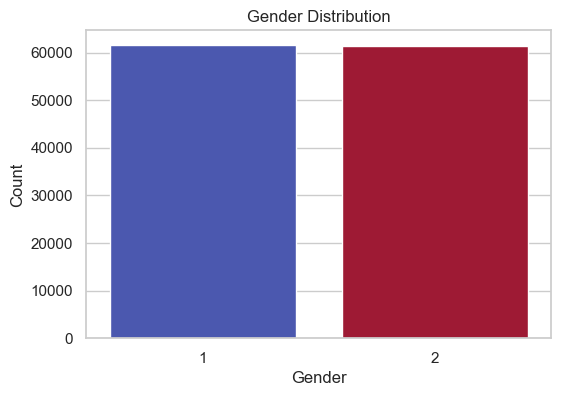

In [179]:
plt.figure(figsize=(6,4))
sns.countplot(x='PUFC04_SEX', data=labor_df, hue='PUFC04_SEX', palette="coolwarm", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

3. Employment Status Distribution

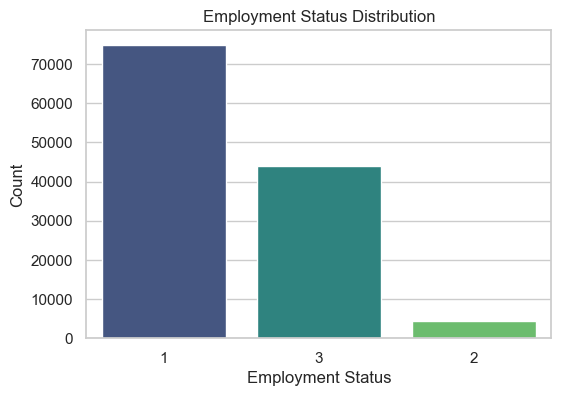

In [180]:
plt.figure(figsize=(6,4))
sns.countplot(x='PUFNEWEMPSTAT', data=labor_df, hue='PUFNEWEMPSTAT', palette="viridis", legend=False)
plt.title("Employment Status Distribution")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

4. Age VS Martial Status

In [181]:
labor_df['PUFC06_MSTAT'].unique()

array(['2', '1', '3', '4', '6', '5'], dtype=object)

Here we see that the categories are 1-6. Which based on the metadata 1 is to Single and so on and so forth. Which is included in the map below and changed for better visualization for our boxplot.

In [182]:
marital_status_map = {
    "1": "Single",
    "2": "Married",
    "3": "Widowed",
    "4": "Divorced",
    "5": "Annuled",
    "6": "Unknown"
}

labor_df['PUFC06_MSTAT'] = labor_df['PUFC06_MSTAT'].map(marital_status_map)

In [183]:
labor_df['PUFC06_MSTAT'].unique()

array(['Married', 'Single', 'Widowed', 'Divorced', 'Unknown', 'Annuled'],
      dtype=object)

As we can see here, it has been changed. we will now do a boxplot for Age and Martial Status.

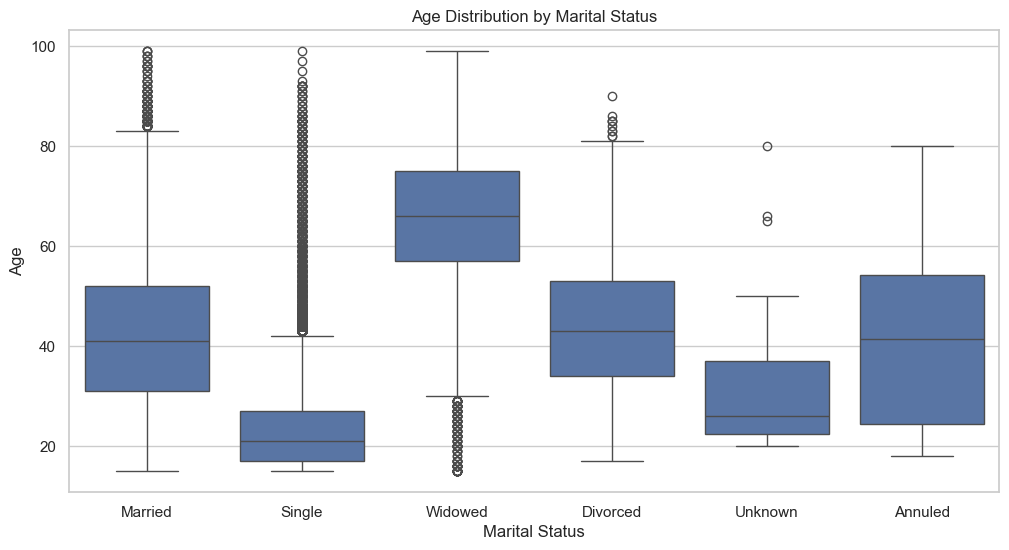

In [184]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PUFC06_MSTAT', y='PUFC05_AGE', data=labor_df)
plt.title("Age Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Age")
plt.show()


5. Here lets take a look at the Gender Breakdown and their Employment Status

Here it is similar to the previous EDA, let us start by mapping it to make it more visually appealing.

In [185]:
labor_df['PUFNEWEMPSTAT'].unique()

array(['1', '3', '2'], dtype=object)

In [186]:
labor_df['PUFC04_SEX'].unique() 

array([1, 2], dtype=int64)

In [187]:
employment_status = {
    "1": "Employed",
    "2": "Unemployed",
    "3": "Not in the labor force",
}
gender = {
    1: "Male",
    2: "Female",
}
labor_df['PUFNEWEMPSTAT'] = labor_df['PUFNEWEMPSTAT'].astype(str)
labor_df['PUFC04_SEX'] = labor_df['PUFC04_SEX'].astype(int)

labor_df['PUFC04_SEX'] = labor_df['PUFC04_SEX'].map(gender)
labor_df['PUFNEWEMPSTAT'] = labor_df['PUFNEWEMPSTAT'].map(employment_status)

In [188]:
labor_df['PUFC04_SEX'].unique() 

array(['Male', 'Female'], dtype=object)

After we are done with mapping them, we show a countplot with employment status by gender

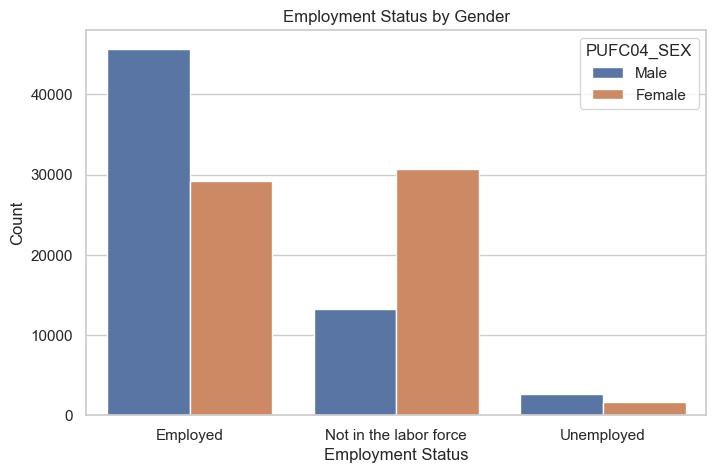

In [189]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PUFNEWEMPSTAT', hue='PUFC04_SEX', data=labor_df)
plt.title("Employment Status by Gender")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

6. Income Distribution by Gender

In [190]:
labor_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      dtype=object)

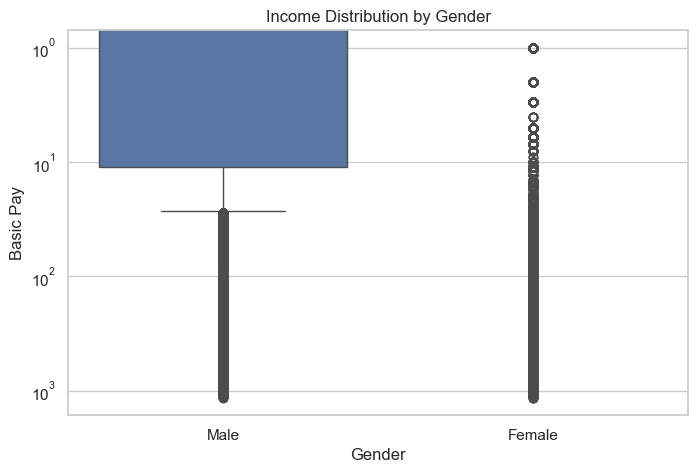

In [191]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='PUFC04_SEX', y='PUFC25_PBASIC', data=labor_df)
plt.yscale("log")  
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Basic Pay")
plt.show()

7. Working Hours Analysis


First let's check the unique for both PUFC18_PNWHRS and PUFC19_PHOURS

In [192]:
labor_df['PUFC18_PNWHRS'].unique()

array(['08', '04', '12', '  ', '10', '02', '03', '06', '09', '07', '05',
       '01', '13', '15', '14', '11', '16'], dtype=object)

In [193]:
labor_df['PUFC19_PHOURS'].unique()

array(['024', '008', '020', '072', '048', '   ', '010', '060', '016',
       '040', '070', '004', '032', '045', '030', '015', '003', '002',
       '042', '063', '054', '036', '007', '028', '006', '014', '012',
       '018', '056', '025', '000', '091', '035', '021', '009', '084',
       '090', '050', '005', '049', '066', '044', '077', '057', '098',
       '105', '052', '064', '065', '059', '027', '055', '112', '022',
       '038', '096', '078', '033', '001', '089', '058', '075', '071',
       '053', '062', '039', '031', '011', '034', '043', '026', '103',
       '094', '047', '108', '041', '046', '013', '080', '100', '017',
       '092', '029', '102', '082', '088', '076', '093', '051', '019',
       '074', '068', '061', '067', '069', '073', '101', '086', '023',
       '037', '081', '079', '085'], dtype=object)

As we can see, the Normal Working Hours and Number of Hours Worked during the past week looks quite normal with a bit of outlier as there are some that are either too low, or too high

In [194]:
labor_df["PUFC18_PNWHRS"] = pd.to_numeric(labor_df["PUFC18_PNWHRS"], errors="coerce")
labor_df["PUFC19_PHOURS"] = pd.to_numeric(labor_df["PUFC19_PHOURS"], errors="coerce")

bins = [-1, 19, 29, 39, 48, 999]  
labels = ["less than 20 hours", "20 - 29", "30 - 39", "40 - 48", "49 and over"]

labor_df["PUFC19_PHOURS_CAT"] = pd.cut(labor_df["PUFC19_PHOURS"], bins=bins, labels=labels, right=True)

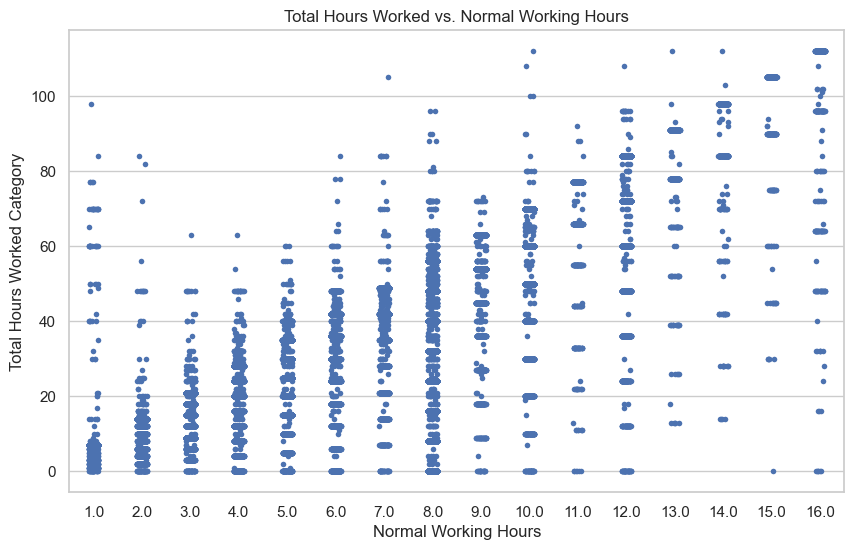

In [195]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='PUFC18_PNWHRS', y='PUFC19_PHOURS', data=labor_df, jitter=True, size=4)
plt.title("Total Hours Worked vs. Normal Working Hours")
plt.xlabel("Normal Working Hours")
plt.ylabel("Total Hours Worked Category")
plt.show()

Here we can see that the average working hours is 8, with some outliers being in 100+ work hours for the week, and some people who barely worked for the week.

8. Education vs Salary

In [196]:
labor_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      dtype=object)

In [197]:
labor_df['PUFC07_GRADE'].value_counts()

PUFC07_GRADE
350    33252
280    14494
330     7458
320     6936
820     5938
       ...  
542        4
576        4
544        1
585        1
564        1
Name: count, Length: 67, dtype: int64

In [198]:
education_mapping = {
    0: "No Education", 10: "Preschool",
    210: "Elementary", 220: "Elementary", 230: "Elementary", 240: "Elementary", 250: "Elementary", 260: "Elementary", 280: "Elementary Graduate",
    310: "High School", 320: "High School", 330: "High School", 340: "High School", 350: "High School Graduate",
    410: "Vocational", 420: "Vocational",
    810: "College (Undergrad)", 820: "College (Undergrad)", 830: "College (Undergrad)", 840: "College (Undergrad)",
    900: "Post Baccalaureate"
}
labor_df['PUFC07_GRADE'] = pd.to_numeric(labor_df['PUFC07_GRADE'], errors='coerce')

labor_df['Education_Category'] = labor_df['PUFC07_GRADE'].map(education_mapping).fillna("Programs")

education_order = ["No Education", "Preschool", "Elementary", "Elementary Graduate", 
                   "High School", "High School Graduate", "Vocational", 
                   "College (Undergrad)", "Post Baccalaureate", "Programs"]

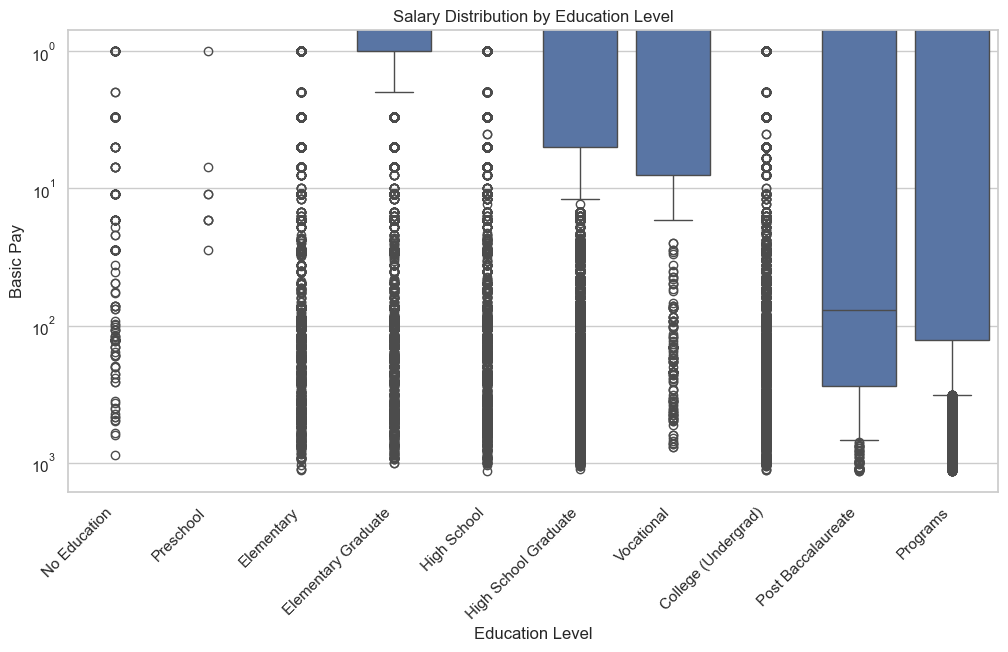

In [199]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education_Category', y='PUFC25_PBASIC', data=labor_df, order=education_order)
plt.yscale("log")  
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Basic Pay")
plt.xticks(rotation=45, ha='right')
plt.show()


Here we can see that employees with no education are little to none. Then with post baccalaureate as one of the highest. But we see that there are a lot of outliers.

9. Hours Worked vs Age

Here Let's take a look at the hours worked vs age

In [200]:
labor_df['PUFC28_THOURS'].unique()

array(['032', '008', '034', '033', '072', '048', '   ', '010', '020',
       '060', '024', '040', '056', '047', '044', '070', '004', '016',
       '045', '050', '055', '015', '003', '002', '042', '063', '054',
       '036', '007', '052', '006', '014', '012', '028', '018', '030',
       '025', '000', '091', '035', '046', '038', '009', '043', '023',
       '011', '084', '064', '013', '021', '065', '061', '078', '090',
       '005', '080', '049', '066', '022', '077', '057', '098', '059',
       '039', '029', '105', '041', '027', '031', '062', '051', '087',
       '026', '112', '019', '037', '096', '094', '053', '001', '017',
       '089', '074', '071', '058', '069', '075', '068', '083', '076',
       '092', '102', '086', '109', '100', '081', '103', '088', '108',
       '085', '093', '099', '110', '073', '082', '106', '067', '079',
       '101', '095', '104'], dtype=object)

In [201]:
labor_df['PUFC05_AGE'].unique()

array([49, 61, 19, 48, 41, 20, 15, 59, 51, 26, 23, 71, 54, 27, 46, 18, 80,
       43, 38, 73, 35, 72, 74, 39, 16, 22, 50, 44, 34, 40, 17, 53, 45, 77,
       81, 37, 25, 52, 55, 68, 56, 30, 95, 70, 32, 65, 62, 36, 92, 33, 28,
       24, 21, 29, 89, 31, 57, 47, 42, 63, 86, 60, 76, 79, 88, 58, 64, 69,
       66, 75, 78, 67, 85, 84, 87, 82, 83, 91, 93, 90, 96, 94, 97, 98, 99],
      dtype=int64)

In [202]:
labor_df['PUFC28_THOURS'] = pd.to_numeric(labor_df['PUFC28_THOURS'], errors='coerce')
labor_df['PUFC28_THOURS'] = labor_df['PUFC28_THOURS'].fillna(0)

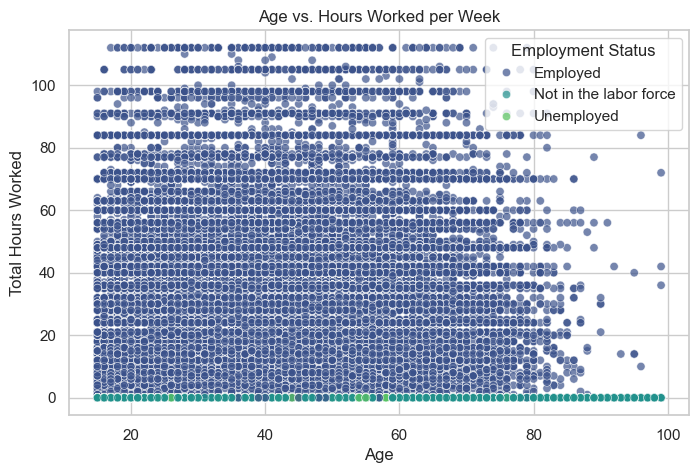

In [203]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PUFC05_AGE', y='PUFC28_THOURS', hue='PUFNEWEMPSTAT', data=labor_df, palette="viridis", alpha=0.7)
plt.title("Age vs. Hours Worked per Week")
plt.xlabel("Age")
plt.ylabel("Total Hours Worked")
plt.legend(title="Employment Status")
plt.show()


Here we can see that it looks mostly correct, the Not in labor force and unemployed are all on the 0 line as expected. The employed work hours per week are quite varied with some not working, to barely working, to working normally, and to overtime.

10. Employment Status by Marital Status

In [204]:
labor_df['PUFNEWEMPSTAT'].unique()

array(['Employed', 'Not in the labor force', 'Unemployed'], dtype=object)

In [205]:
labor_df['PUFC06_MSTAT'].unique()

array(['Married', 'Single', 'Widowed', 'Divorced', 'Unknown', 'Annuled'],
      dtype=object)

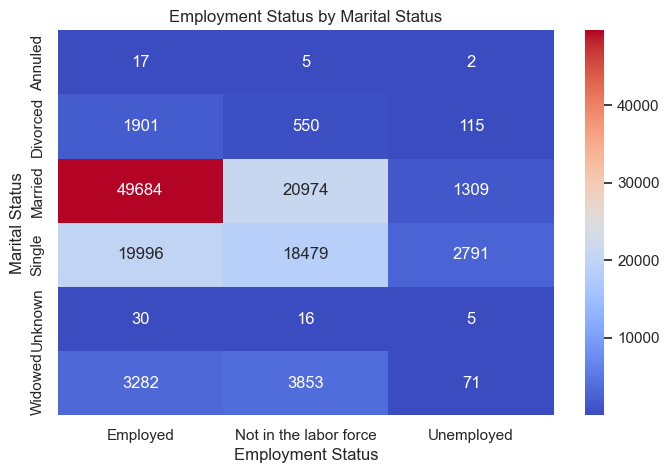

In [206]:
plt.figure(figsize=(8, 5))
heatmap_data = pd.crosstab(labor_df['PUFC06_MSTAT'], labor_df['PUFNEWEMPSTAT'])
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("Employment Status by Marital Status")
plt.xlabel("Employment Status")
plt.ylabel("Marital Status")
plt.show()

Here we can see a majority of Employed and Not in the labor force are mostly in the Single and Married Statuses. 

---

# **Section 6. Initial Model Training**

In [207]:
NB_df_cpy = labor_df.copy()
NB_df_cpy.nunique().sort_values()[:15]
# PUFURB2K10                rural or urban
# PUFC09_GRADTECH           vocational or technical
# PUFNEWEMPSTAT             employement status
# PUFC06_MSTAT              marital staus 

PUFSVYMO               1
PUFSVYYR               1
PUFC11_WORK            2
PUFURB2K10             2
PUFC09_GRADTECH        2
PUFC04_SEX             2
PUFNEWEMPSTAT          3
PUFRPL                 4
PUFC10_CONWR           5
PUFC19_PHOURS_CAT      5
PUFC06_MSTAT           6
Education_Category    10
PUFC03_REL            11
PUFC18_PNWHRS         16
PUFREG                17
dtype: int64

In [208]:
NB_df_cpy['PUFC05_AGE']
# ! model improvement
NB_df_cpy["Age_Group"] = pd.cut(NB_df_cpy["PUFC05_AGE"], bins=[0, 20, 40, 60, 100], 
                            labels=["Teen", "Young Adult", "Middle-aged", "Senior"])
NB_df_cpy[["PUFC05_AGE", "Age_Group"]]

,PUFC05_AGE,Age_Group
0,49,Middle-aged
1,61,Senior
2,19,Teen
3,48,Middle-aged
4,41,Middle-aged
...,...,...
180850,34,Young Adult
180851,32,Young Adult
180857,29,Young Adult
180858,29,Young Adult


---

In [209]:
NB_features = ['PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC03_REL', 'PUFC09_GRADTECH', 'Age_Group']
NB_output = 'PUFNEWEMPSTAT'

In [210]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

In [211]:
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(NB_df_cpy[NB_features])
y_encoded = NB_df_cpy[NB_output]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=1)

In [213]:
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

In [214]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.686667208319792
Classification Report:
                         precision    recall  f1-score   support

              Employed       0.72      0.83      0.77     15035
Not in the labor force       0.60      0.51      0.55      8748
            Unemployed       0.00      0.00      0.00       833

              accuracy                           0.69     24616
             macro avg       0.44      0.45      0.44     24616
          weighted avg       0.66      0.69      0.67     24616



Decision Trees

Accuracy: 0.7240

Classification Report:

                        precision    recall  f1-score   support

              Employed       0.74      0.85      0.79     14895
Not in the labor force       0.68      0.58      0.62      8880
            Unemployed       0.00      0.00      0.00       841

              accuracy                           0.72     24616
             macro avg       0.47      0.48      0.47     24616
          weighted avg       0.70      0.72      0.71     24616



C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

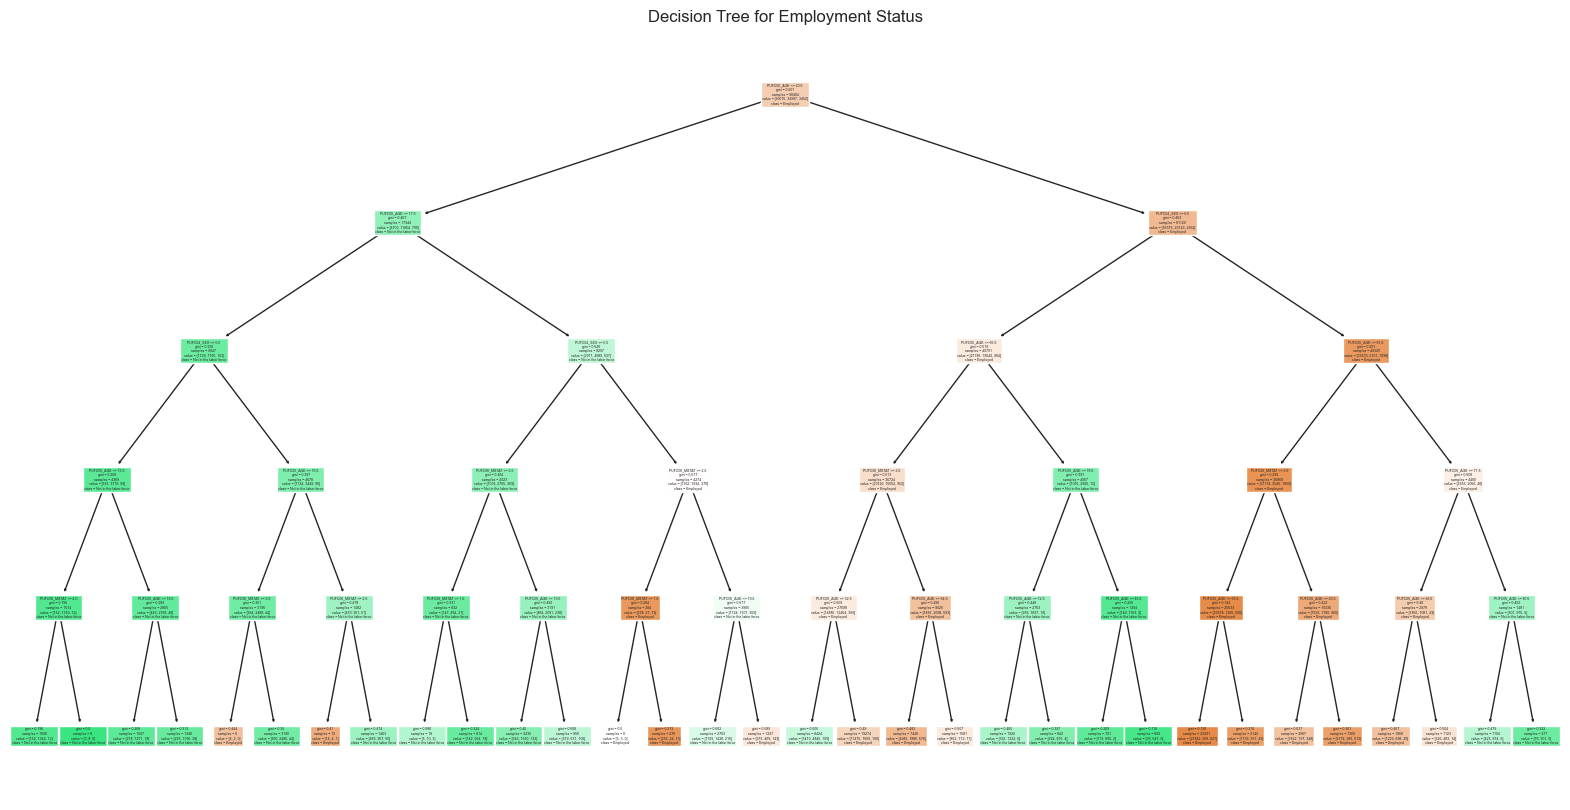

In [215]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # For building and visualizing the decision tree
from sklearn.metrics import classification_report, accuracy_score  # For evaluating model performance
from sklearn.preprocessing import LabelEncoder  # For converting categorical variables to numerical format

# PUFC05_AGE: Age
# PUFC04_SEX: Gender
# PUFC06_MSTAT: Marital status
# PUFC09_GRADTECH: Whether the individual graduated from technical/vocational school
# PUFC28_THOURS: Total hours worked per week (numerical, can indicate employment level)

selected_features = ['PUFC05_AGE', 'PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC09_GRADTECH']

# target variable: Employment status (Employed, Unemployed, Not in the labor force)
target = 'PUFNEWEMPSTAT'

# convert string categories (like Male/Female) into numerical values.
label_encoders = {} 
for col in ['PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC09_GRADTECH']:
    le = LabelEncoder()
    labor_df[col] = le.fit_transform(labor_df[col].astype(str))
    label_encoders[col] = le  

# convert the employment status labels to numeric codes
target_le = LabelEncoder()
labor_df[target] = target_le.fit_transform(labor_df[target])

# split
# random_state ensures reproducibility
X = labor_df[selected_features]
y = labor_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# max_depth=5 limits the depth of the tree to prevent overfitting
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

clf.fit(X_train, y_train)

# predict employment status on the test set
y_pred = clf.predict(X_test)

# print the accuracy score (overall correctness of predictions)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=selected_features, class_names=target_le.classes_, filled=True)
plt.title("Decision Tree for Employment Status")
plt.show()


Almost every leaf node predicts "Not in the labor force", except for one node predicting "Employed". This indicates that the model is overfitting to the majority class. While the initial tree has a higher accuracy, it does so by failing to account for the minority classes, leading to poor recall. 

# **Section 7. Error Analysis**


Classification Report:

                        precision    recall  f1-score   support

              Employed       0.74      0.85      0.79     14895
Not in the labor force       0.68      0.58      0.62      8880
            Unemployed       0.00      0.00      0.00       841

              accuracy                           0.72     24616
             macro avg       0.47      0.48      0.47     24616
          weighted avg       0.70      0.72      0.71     24616


Confusion Matrix:



C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waynes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

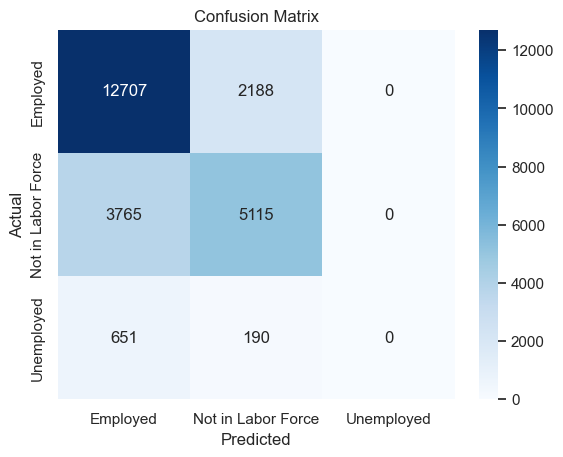

In [216]:
from sklearn.metrics import confusion_matrix

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

class_labels = ["Employed", "Not in Labor Force", "Unemployed"]

print("\nConfusion Matrix:\n")
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Class: Employed (0)
Misclassified instances: 2188
Correctly classified instances: 12707


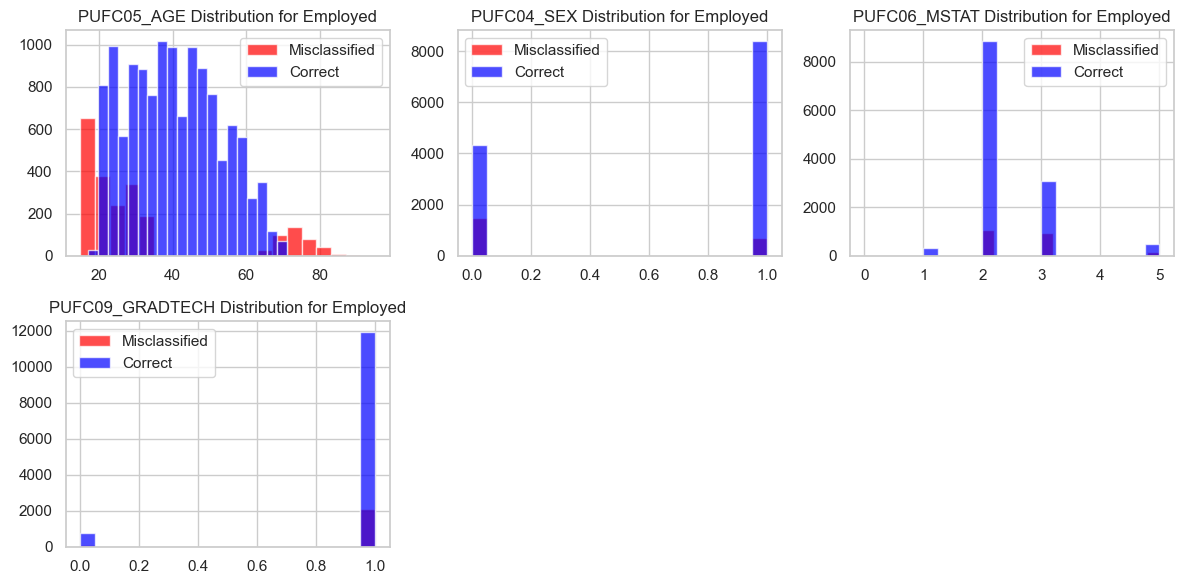


Class: Not in Labor Force (1)
Misclassified instances: 3765
Correctly classified instances: 5115


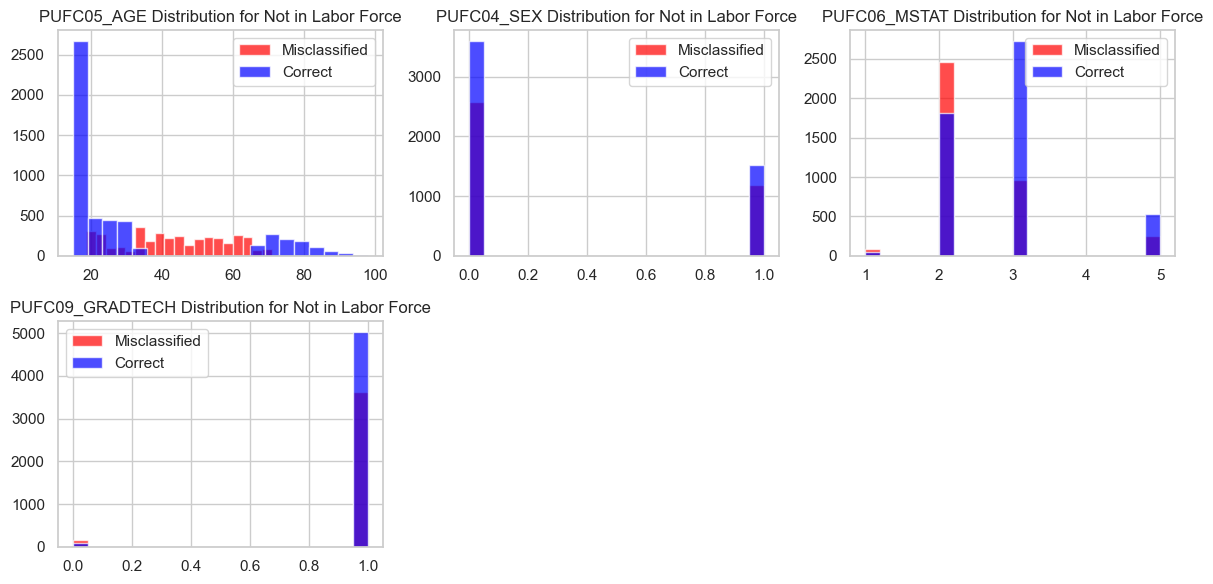


Class: Unemployed (2)
Misclassified instances: 841
Correctly classified instances: 0


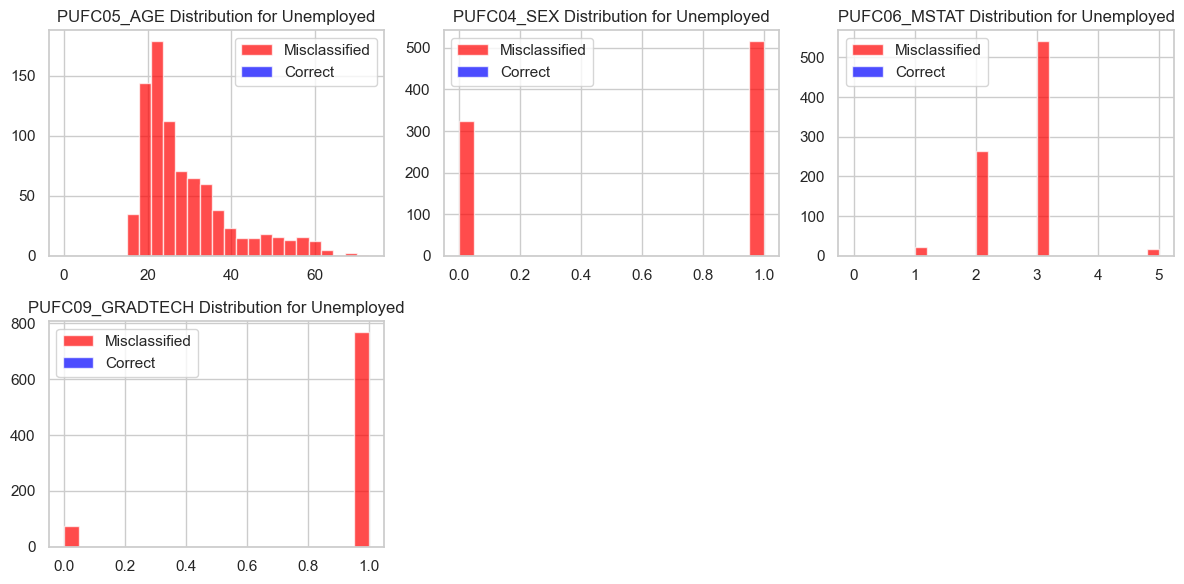

In [217]:
features = X_test.columns if hasattr(X_test, 'columns') else [f'Feature_{i}' for i in range(X_test.shape[1])]
X_test_df = pd.DataFrame(X_test, columns=features)

class_labels = {0: "Employed", 1: "Not in Labor Force", 2: "Unemployed"}

# Misclassification Analysis for Each Class
for class_label, class_name in class_labels.items():
    misclassified = X_test_df[(y_test == class_label) & (y_pred != class_label)]
    correctly_classified = X_test_df[(y_test == class_label) & (y_pred == class_label)]

    print(f"\nClass: {class_name} ({class_label})")
    print(f"Misclassified instances: {len(misclassified)}")
    print(f"Correctly classified instances: {len(correctly_classified)}")

    # Feature distribution comparison
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features[:5]):
        plt.subplot(2, 3, i + 1)
        plt.hist(misclassified[feature], bins=20, alpha=0.7, label="Misclassified", color="red")
        plt.hist(correctly_classified[feature], bins=20, alpha=0.7, label="Correct", color="blue")
        plt.title(f'{feature} Distribution for {class_name}')
        plt.legend()

    plt.tight_layout()
    plt.show()

The error analysis for the decision tree model reveals that the model predominantly predicts "Not in the Labor Force," indicating a strong bias toward the majority class. While some instances were correctly classified as "Employed," their lower frequency suggests that the model has limited ability to distinguish them from the majority class. The model also failed to predict any instances as "Unemployed," implying that it struggles to differentiate this category from the others.

# **Section 8. Improving Model Performance**




=== Balanced Decision Tree Evaluation ===
Accuracy: 0.8391

Classification Report:

                        precision    recall  f1-score   support

              Employed       1.00      0.94      0.97     14895
            Unemployed       0.94      0.67      0.78      8880
Not in the labor force       0.17      0.84      0.28       841

              accuracy                           0.84     24616
             macro avg       0.70      0.82      0.68     24616
          weighted avg       0.95      0.84      0.88     24616



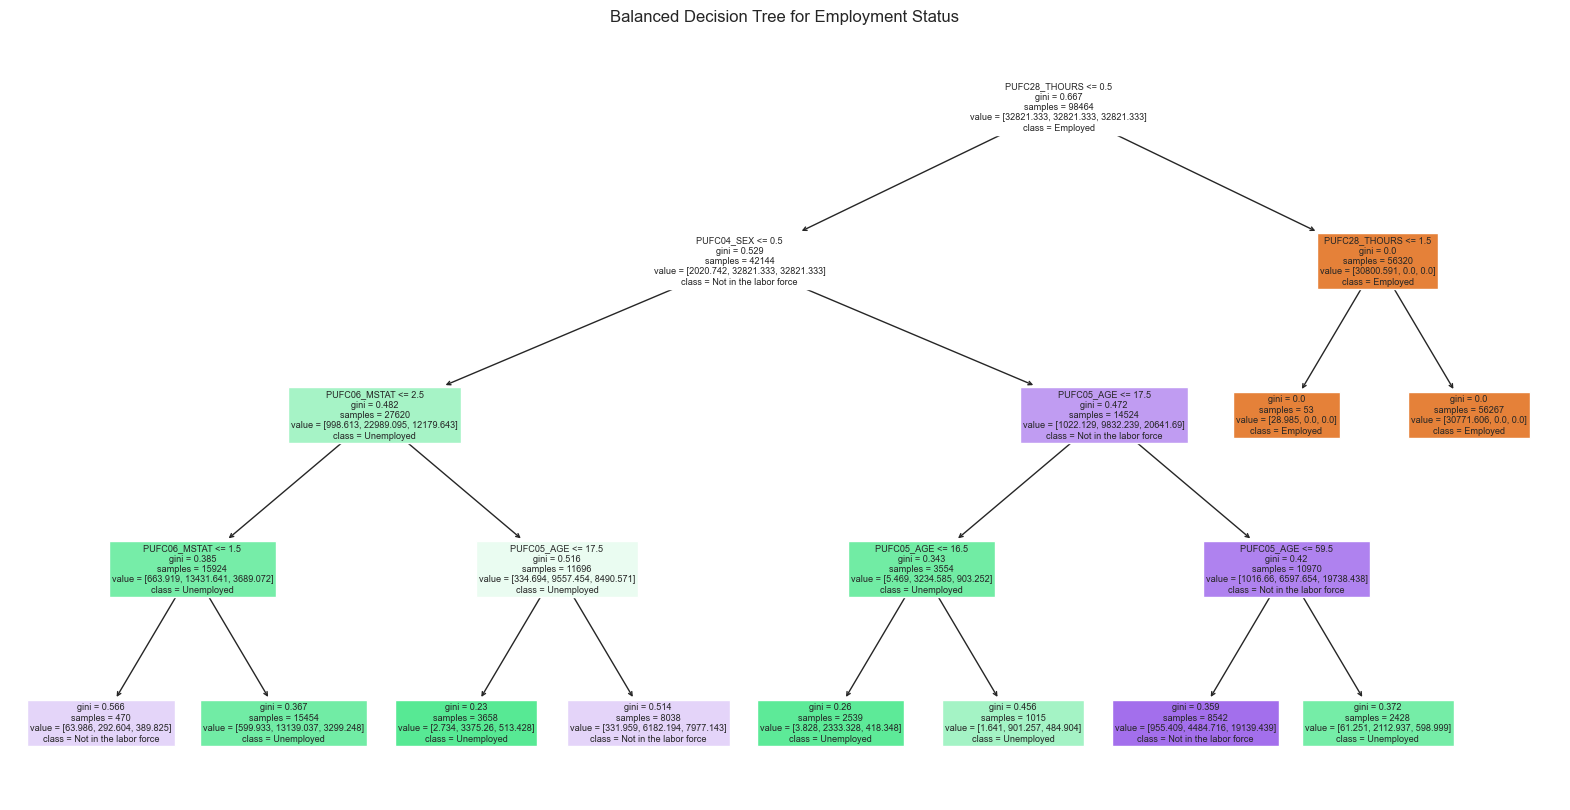

In [218]:
selected_features = ['PUFC05_AGE', 'PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC09_GRADTECH', 'PUFC28_THOURS']
target = 'PUFNEWEMPSTAT'

X = labor_df[selected_features]
y = labor_df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize classifier with class_weight='balanced' to handle class imbalance
clf_balanced = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)

# train the classifier
clf_balanced.fit(X_train, y_train)

y_pred_balanced = clf_balanced.predict(X_test)

print("=== Balanced Decision Tree Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print("\nClassification Report:\n")

target_names = ['Employed', 'Unemployed', 'Not in the labor force']
print(classification_report(y_test, y_pred_balanced, target_names=target_names, zero_division=1))

plt.figure(figsize=(20, 10))
plot_tree(clf_balanced, feature_names=selected_features, class_names=target_names, filled=True)
plt.title("Balanced Decision Tree for Employment Status")
plt.show()

Class weighting was applied to address class imbalance, where the dataset is oversaturated with "Not in Labor Force". The balanced decision tree distributes predictions fairly now across other employment categories and also improved recall for unseen classes before like "Unemployed". The balanced model also achieved higher accuracy, showing improved overall performance and reducing bias toward the majority class.

class_weight='balanced' works by not duplicating or removing any rows but adjusts how important each sample is based on class frequency, if class has lower appearances then it will have higher importance because it is computed by getting the total number of training samples over the number of classes times the number of samples.

# **Section 9. Model Performance Summary**

The best parameters for our decision tree model are the following:

* Class Weighting: balanced
* Max Depth: 5

=== Balanced Decision Tree Evaluation ===
Accuracy: 0.8391

Classification Report:

                        precision    recall  f1-score   support

              Employed       1.00      0.94      0.97     14895
            Unemployed       0.94      0.67      0.78      8880
Not in the labor force       0.17      0.84      0.28       841

              accuracy                           0.84     24616
             macro avg       0.70      0.82      0.68     24616
          weighted avg       0.95      0.84      0.88     24616


Confusion Matrix:



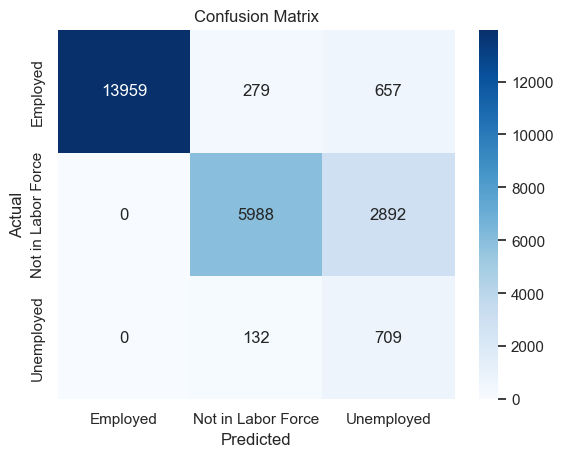

In [219]:
print("=== Balanced Decision Tree Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print("\nClassification Report:\n")

target_names = ['Employed', 'Unemployed', 'Not in the labor force']
print(classification_report(y_test, y_pred_balanced, target_names=target_names, zero_division=1))

class_labels = ["Employed", "Not in Labor Force", "Unemployed"]

print("\nConfusion Matrix:\n")
con_matrix = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Class: Employed (0)
Misclassified instances: 936
Correctly classified instances: 13959


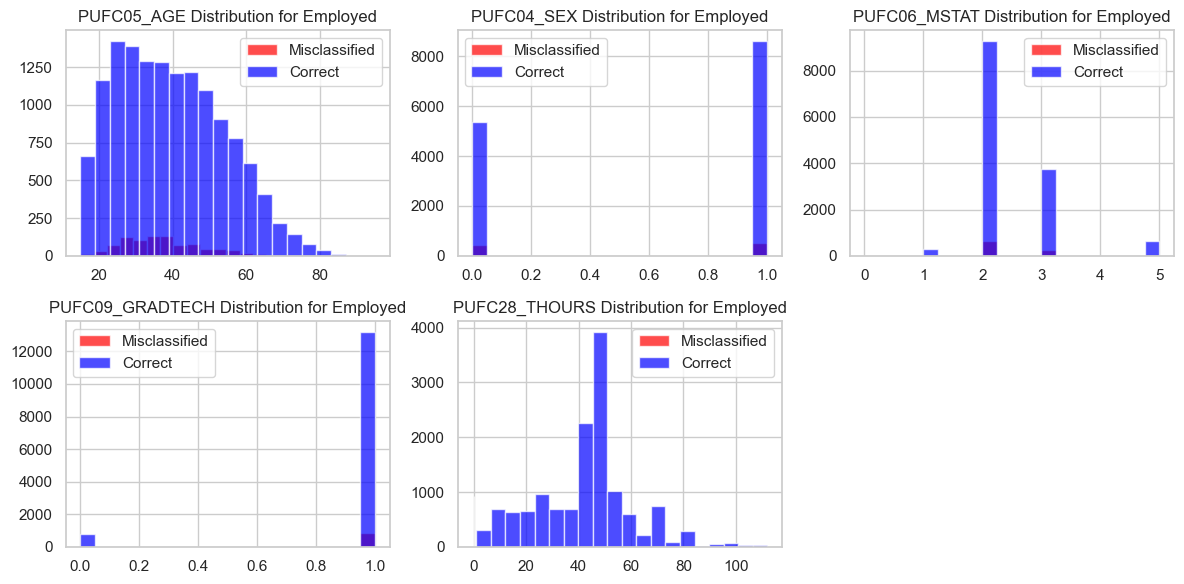


Class: Not in Labor Force (1)
Misclassified instances: 2892
Correctly classified instances: 5988


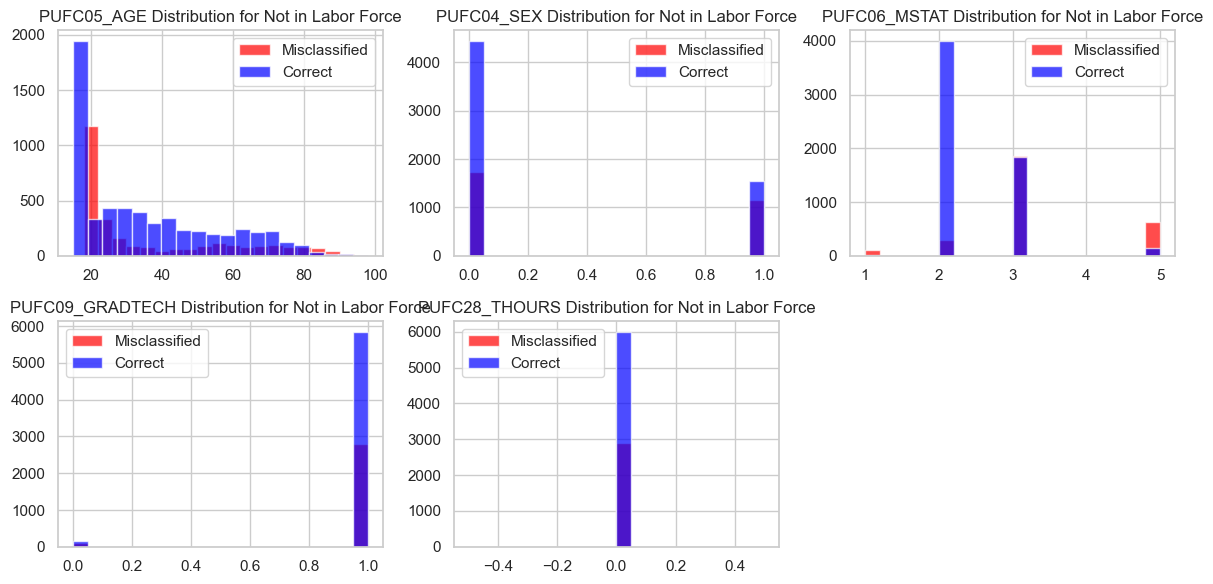


Class: Unemployed (2)
Misclassified instances: 132
Correctly classified instances: 709


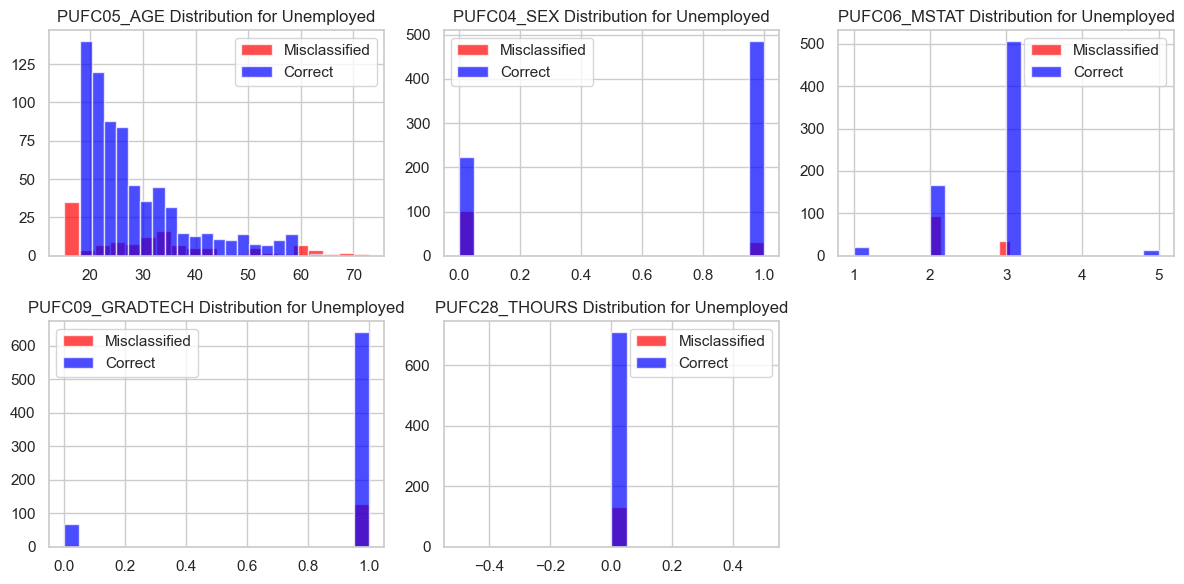

In [220]:
features = X_test.columns if hasattr(X_test, 'columns') else [f'Feature_{i}' for i in range(X_test.shape[1])]
X_test_df = pd.DataFrame(X_test, columns=features)

class_labels = {0: "Employed", 1: "Not in Labor Force", 2: "Unemployed"}

# Misclassification Analysis for Each Class
for class_label, class_name in class_labels.items():
    misclassified = X_test_df[(y_test == class_label) & (y_pred_balanced != class_label)]
    correctly_classified = X_test_df[(y_test == class_label) & (y_pred_balanced == class_label)]

    print(f"\nClass: {class_name} ({class_label})")
    print(f"Misclassified instances: {len(misclassified)}")
    print(f"Correctly classified instances: {len(correctly_classified)}")

    # Feature distribution comparison
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features[:5]):
        plt.subplot(2, 3, i + 1)
        plt.hist(misclassified[feature], bins=20, alpha=0.7, label="Misclassified", color="red")
        plt.hist(correctly_classified[feature], bins=20, alpha=0.7, label="Correct", color="blue")
        plt.title(f'{feature} Distribution for {class_name}')
        plt.legend()

    plt.tight_layout()
    plt.show()

As seen on the latest classification report, confusion matrix, and misclassification analysis, the model showed improvements in overall model performance. The model has significantly reduced misclassifications in the "Employed" and "Unemployed" category.

# **Section 10. Insights and Conclusions** 

The models chosen to analyze the Labor Force Survey 2016 were Linear Regression, K-Nearest Neighbors (KNN), and Decision Trees. Each model exhibited strengths and limitations in predicting the target variable. The Decision Tree model demonstrated reasonable performance but showed signs of overfitting. To address this, class weighting was applied, resulting in a more balanced decision tree with improved generalization. However, despite these efforts, the model still exhibited sensitivity to noisy data, which may have impacted its reliability.

This project allowed the team to explore different machine learning models and observe their performance on a real-world dataset. The findings highlight the importance of selecting appropriate preprocessing techniques, feature selection methods, and hyperparameter tuning strategies to improve the model.

# **Section 11. References (included AI transcript)**